In [10]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
BACKLOG_SIZE= 72 #287
burned=np.array([4,4,4,8]) #[4,4,4,8,5,10,20,41,15,30,55,52]
SPRINTS_REMAINING = 10 #

#burned=np.array([55,52,30,3])
#y_sprints = np.array([200]) 


y_sprints = np.array([BACKLOG_SIZE]) #esfuerzo pendiente por sprint. inicializar con tamaño total actual del product backlog
y_sprints = y_sprints.reshape(-1,1)

for b in burned:
    y_sprints=np.append(y_sprints, y_sprints[-1]-b)
    

X = np.arange(1,y_sprints.size+1)
X = X.reshape(-1, 1)
X_predict=np.arange(y_sprints.size+1,y_sprints.size+SPRINTS_REMAINING+1)
X_predict=X_predict.reshape(-1,1)


Text(12, 180, 'Pendiente en\nSprint 8: 43')

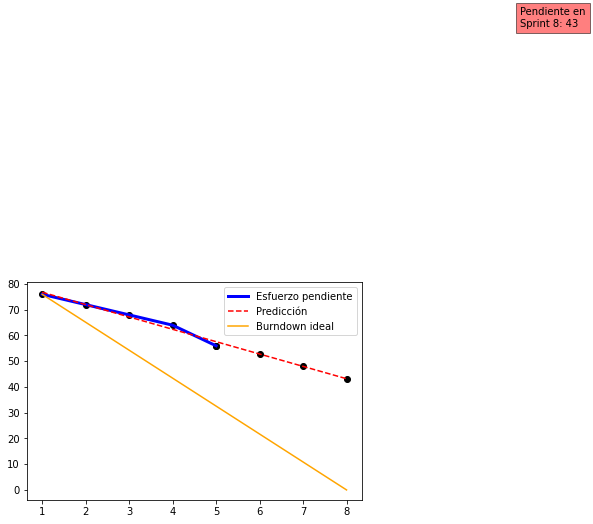

In [3]:
#predicción por regresión lineal simple del trabajo realizado
lr = linear_model.LinearRegression()
lr.fit(X,y_sprints)


%matplotlib inline  
plt.scatter(X, y_sprints,  color='black')
plt.plot(X, y_sprints,  color='blue',linewidth=3)

# predicción
y_fitted=lr.predict(X)
y_predictions=lr.predict(X_predict)
plt.scatter(np.append(X[-1],X_predict),np.append(y_sprints[-1],y_predictions),  color='black')
plt.plot(np.append(X,X_predict),np.append(y_fitted,y_predictions), color='red',linestyle='dashed')

#ideal (diagonal)
plt.plot([1,X_predict[-1]],[y_sprints[0], 0], color='orange')

#legend
plt.legend(['Esfuerzo pendiente','Predicción','Burndown ideal'])

#print remaining effort
textstr = '\n'.join((
    "Pendiente en",
    "Sprint %s: %d" % (str(y_sprints.size + SPRINTS_REMAINING),np.int(y_predictions[-1]))))
plt.text(12, 180,textstr, bbox=dict(facecolor='red', alpha=0.5))

[72 68 64 60 52]
[47. 42. 37. 32. 27. 22. 17. 12.  7.  2.]


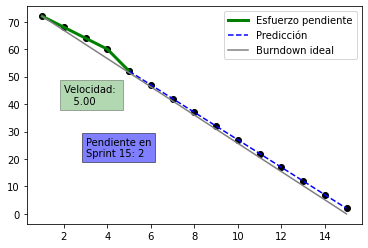

In [11]:
# proyección por Velocidad

y_diffs=[]
for i in np.arange(0,y_sprints.size-1):
    dif=y_sprints[i]-y_sprints[i+1]
    y_diffs=np.append(y_diffs,dif)

velocity = np.mean(y_diffs)
remaining_effort =y_sprints[-1]

# plot current
%matplotlib inline  
plt.scatter(X, y_sprints,  color='black')
plt.plot(X, y_sprints,  color='green',linewidth=3)

#plot prediction
y_predictions=np.zeros(SPRINTS_REMAINING)
for i in np.arange(0,SPRINTS_REMAINING):
    y_predictions[i]=remaining_effort-((i+1)*velocity)
plt.scatter(np.append(X[-1],X_predict),np.append(y_sprints[-1],y_predictions),  color='black')
plt.plot(np.append(X[-1],X_predict),np.append(y_sprints[-1],y_predictions), color='blue',linestyle='dashed')

#ideal (diagonal)
plt.plot([1,X_predict[-1]],[y_sprints[0], 0], color='grey')

#legend
plt.legend(['Esfuerzo pendiente','Predicción','Burndown ideal'])

#print remaining effort and velocity
textstr = '\n'.join((
    "Pendiente en",
    "Sprint %s: %d" % (str(y_sprints.size + SPRINTS_REMAINING),np.int(y_predictions[-1]))))
plt.text(3, 21,textstr, bbox=dict(facecolor='blue', alpha=0.5))

textstr = '\n'.join((
    "Velocidad: ",
    "   %.2f" % velocity))
plt.text(2, 40,textstr, bbox=dict(facecolor='green', alpha=0.3))

print(y_sprints)
print(y_predictions)

Text(12, 180, 'Pendiente en\nSprint 15: 955')

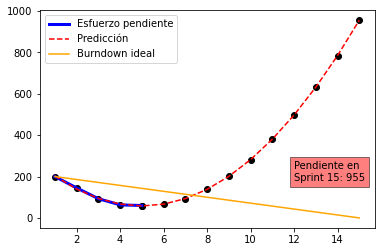

In [8]:
#predicción por regresipon polinómica grado 2

from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
x_poly_predict =  polynomial_features.fit_transform(X_predict)

lr.fit(x_poly,y_sprints)
y_fitted=lr.predict(x_poly)


%matplotlib inline  
plt.scatter(X, y_sprints,  color='black')
#plt.plot(X, y_fitted,  color='red',linestyle='dashed')
plt.plot(X, y_sprints,  color='blue',linewidth=3)

# predicción
#y_predictions=lr.predict(x_poly_predict)
y_predictions=lr.predict(x_poly_predict)
plt.scatter(np.append(X[-1],X_predict),np.append(y_sprints[-1],y_predictions),  color='black')
plt.plot(np.append(X,X_predict),np.append(y_fitted,y_predictions), color='red',linestyle='dashed')

#ideal (diagonal)
plt.plot([1,X_predict[-1]],[y_sprints[0], 0], color='orange')

#legend
plt.legend(['Esfuerzo pendiente','Predicción','Burndown ideal'])

#print remaining effort
textstr = '\n'.join((
    "Pendiente en",
    "Sprint %s: %d" % (str(y_sprints.size + SPRINTS_REMAINING),np.int(y_predictions[-1]))))
plt.text(12, 180,textstr, bbox=dict(facecolor='red', alpha=0.5))